# Quantified-Mind.com Data Analysis

The goal of this example notebook to take the results of a testing export from Quantified Mind and do some data analysis to look at the effects. 

### What is Quantified Mind? 

[Quantified-Mind.com](http://www.quantified-mind.com/about) is a free website that lets you take neuropsychological tests to measure your basic cognitive abilities, like reaction time, attention, memory, etc. It is designed so you quantify how lifestyle (sleep, exercise, time of day) and intervention factors (meditation, caffeine, nootropics, etc.) affect your cognition. 

------

### EXAMPLE: Meditation Effect on Attention

__Did meditating make your smarter or improve your attention? Find out!__  

This sample data analysis followed the [Meditation Experiment](http://www.quantified-mind.com/experiment/meditation), a 28-session test to see if meditation improves attention and information processing.   

NOTE: If you did a different experiment, you'll need to tweak a few of the fields and references to make it work. 

The only real requirement is installing the standard dependendicies, uploading your data the directory, and confirming reference in the import. 

------

### Libraries

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

----

# Data Preparation and Processing

In [2]:
# import the data
data = pd.read_csv("data/quantified-mind-meditation.csv")

In [3]:
data.columns = ['Session', 
                'Date', 
                'Time', 
                'Any other comments?', 
                'Before / After',
                'Meditate / Activity',
                'Activity Minutes',
                'Activity Name',
                'Cued Attention (dot)',
                'Go / No-Go'
               ]

In [4]:
# cleanup the data frame
data['Session'] = data['Session'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Date'] = data['Date'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Time'] = data['Time'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Any other comments?'] = data['Any other comments?'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Before / After'] = data['Before / After'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Meditate / Activity'] = data['Meditate / Activity'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Activity Name'] = data['Activity Name'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip(', ').rstrip('\''))
data['Activity Minutes'] = data['Activity Minutes'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Cued Attention (dot)'] = data['Cued Attention (dot)'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))
data['Go / No-Go'] = data['Go / No-Go'].map(lambda x: x.lstrip('\(\'').rstrip(')').rstrip('1234567890').rstrip('\', '))

In [5]:
# Numbers
data['Activity Minutes'] = data['Activity Minutes'].astype(float)
data['Cued Attention (dot)'] = data['Cued Attention (dot)'].astype(float)
data['Go / No-Go'] = data['Go / No-Go'].astype(float)

In [6]:
# Timestamps
data['Timestamp'] = data['Date'] + ' ' + data['Time']
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [7]:
data['Situation'] = data['Before / After'] + '-' + data['Meditate / Activity']

In [8]:
data['Situation'].unique()

array(['After-Meditate', 'Before-Meditate', 'Before-Activity',
       'After-Activity'], dtype=object)

In [9]:
# drop a renegade row
data = data.drop(data.index[0])

In [10]:
# Expoort Cleaned Up Data
data.to_csv('data/Quantified-Mind-Meditation-Processed.csv')

In [11]:
# checks
len(data)

28

In [12]:
data.tail()

,Session,Date,Time,Any other comments?,Before / After,Meditate / Activity,Activity Minutes,Activity Name,Cued Attention (dot),Go / No-Go,Timestamp,Situation
24,25,2019-07-05,10:00:09,,After,Activity,17.04,Sort PDF Files,593.979,601.161,2019-07-05 10:00:09,After-Activity
25,26,2019-07-06,10:29:17,,Before,Meditate,0.00,,553.197,543.811,2019-07-06 10:29:17,Before-Meditate
26,27,2019-07-06,10:50:03,,After,Meditate,9.90,,578.350,601.517,2019-07-06 10:50:03,After-Meditate
27,28,2019-07-07,10:48:56,,Before,Activity,0.00,,603.050,608.918,2019-07-07 10:48:56,Before-Activity
28,29,2019-07-07,11:06:27,,After,Activity,9.90,Masturbate,580.571,589.911,2019-07-07 11:06:27,After-Activity


------

# Exploratory Data Analysis

In [13]:
data.Situation.value_counts()

After-Activity     7
Before-Meditate    7
Before-Activity    7
After-Meditate     7
Name: Situation, dtype: int64

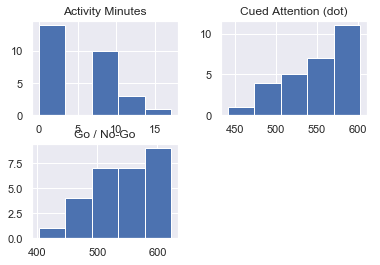

In [14]:
hist = data.hist(bins=5)

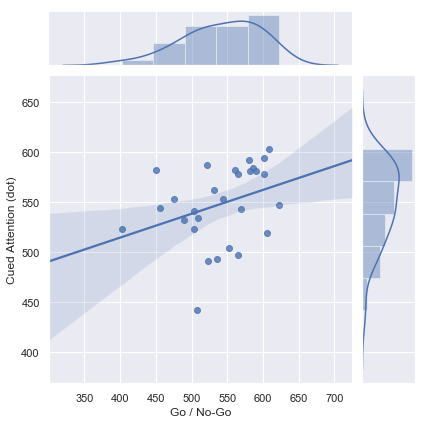

In [15]:
ax = sns.jointplot(x="Go / No-Go", y="Cued Attention (dot)", data=data, kind="reg");
plt.show()

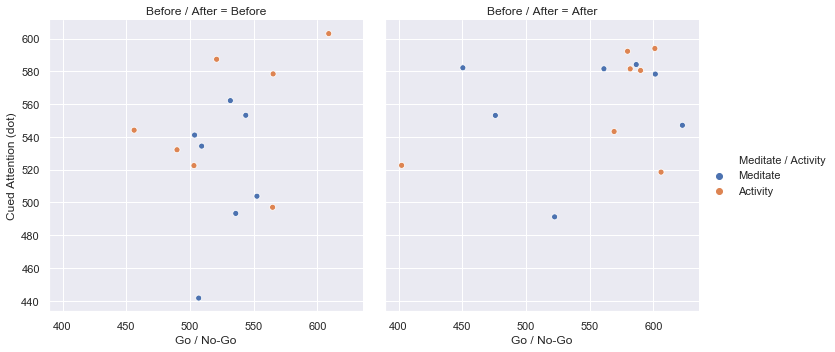

In [16]:
# is there some relationship b/t two tests? 
ax = sns.relplot(x="Go / No-Go", y="Cued Attention (dot)", col="Before / After", hue="Meditate / Activity", data=data);

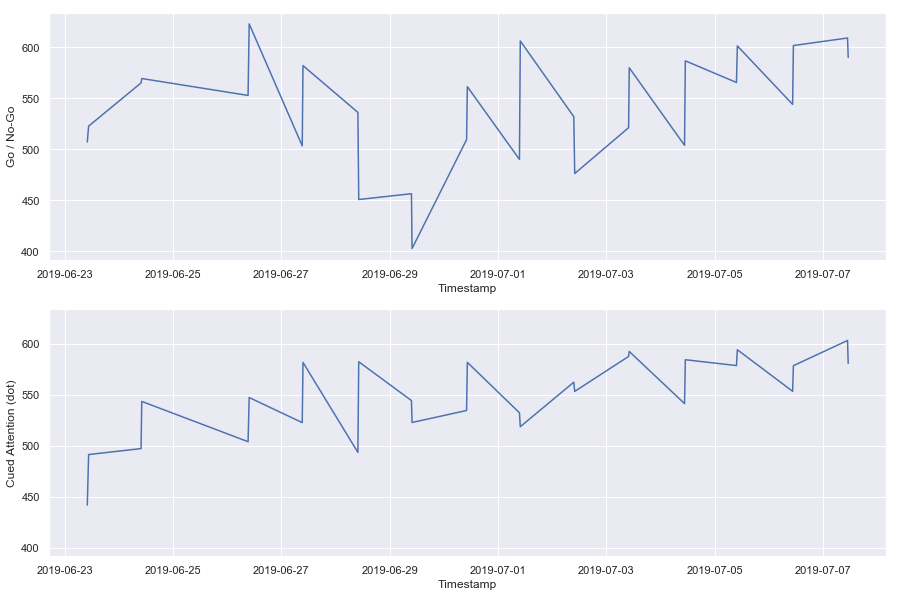

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", data=data, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", data=data, ax=ax2)
plt.close(2)
plt.close(3)
plt.show()

Before and After


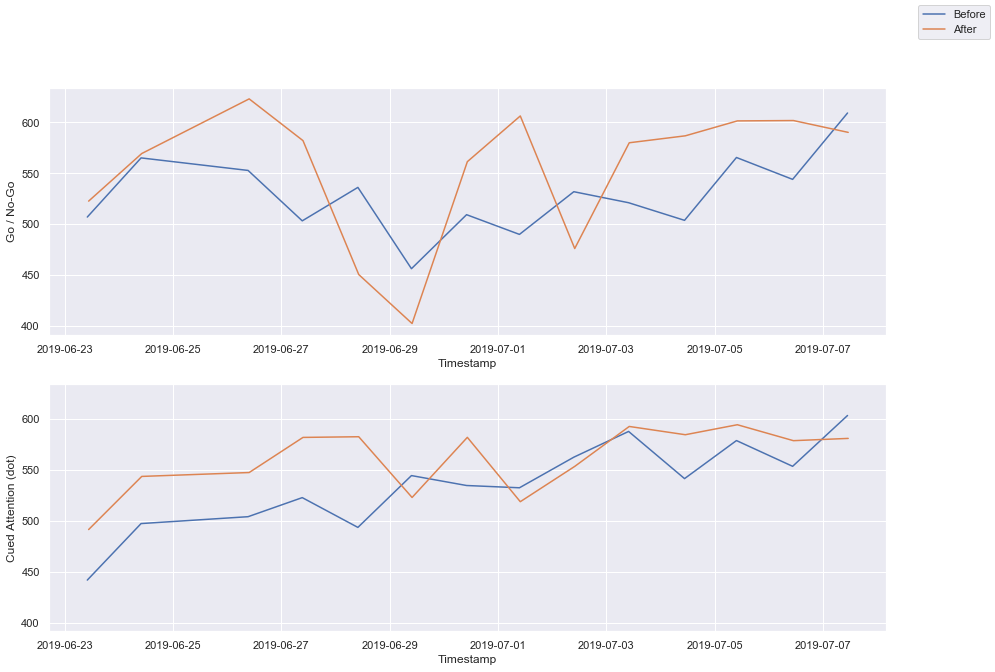

In [18]:
print("Before and After")
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=data, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=data, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()

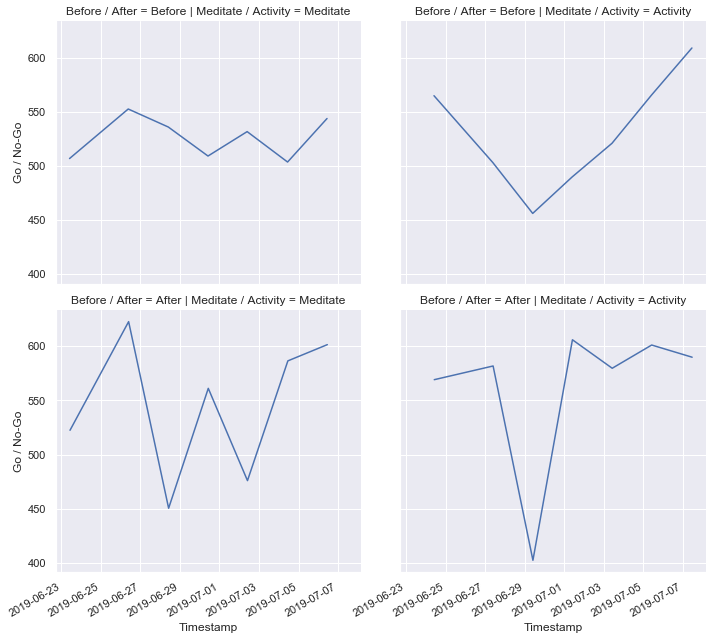

In [19]:
g = sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", data=data,  row="Before / After", col="Meditate / Activity")
g.fig.autofmt_xdate()

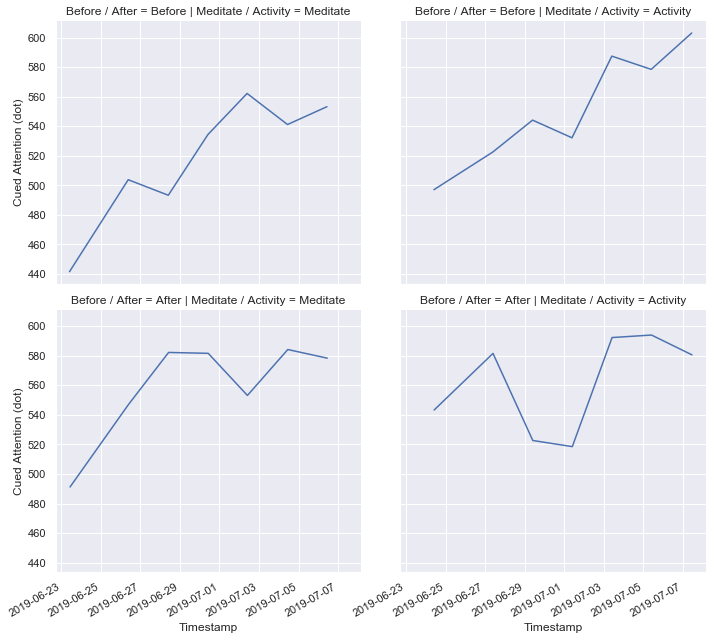

In [20]:
g = sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", data=data,  row="Before / After", col="Meditate / Activity")
g.fig.autofmt_xdate()

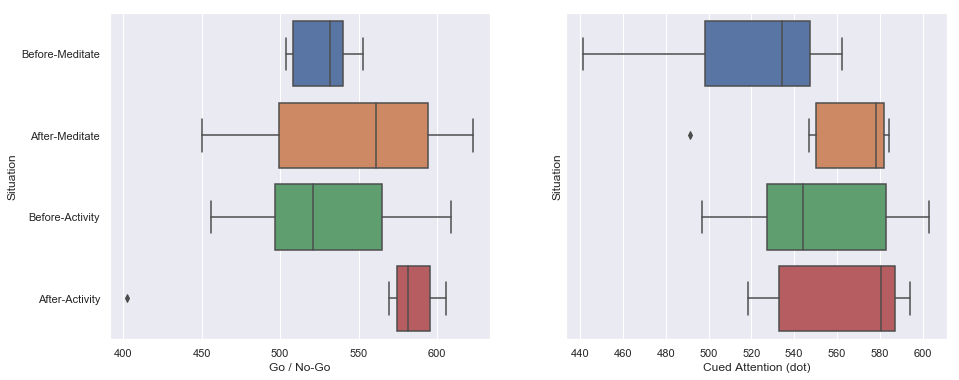

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.boxplot(x="Go / No-Go", y='Situation', data=data, ax=ax1)
sns.boxplot(x="Cued Attention (dot)", y='Situation', data=data, ax=ax2)
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

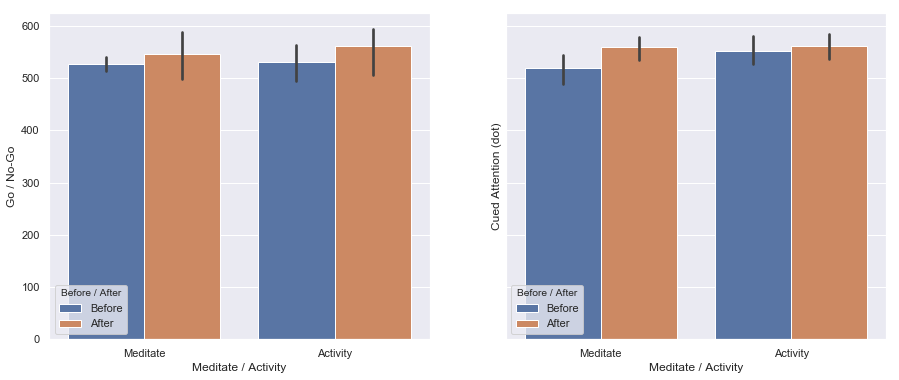

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.catplot(x="Meditate / Activity", y="Go / No-Go", hue="Before / After", kind="bar", data=data, ax=ax1);
sns.catplot(x="Meditate / Activity", y="Cued Attention (dot)", hue="Before / After", kind="bar", data=data, ax=ax2);
plt.close(2)
plt.close(3)
plt.show()

Before and After Meditation


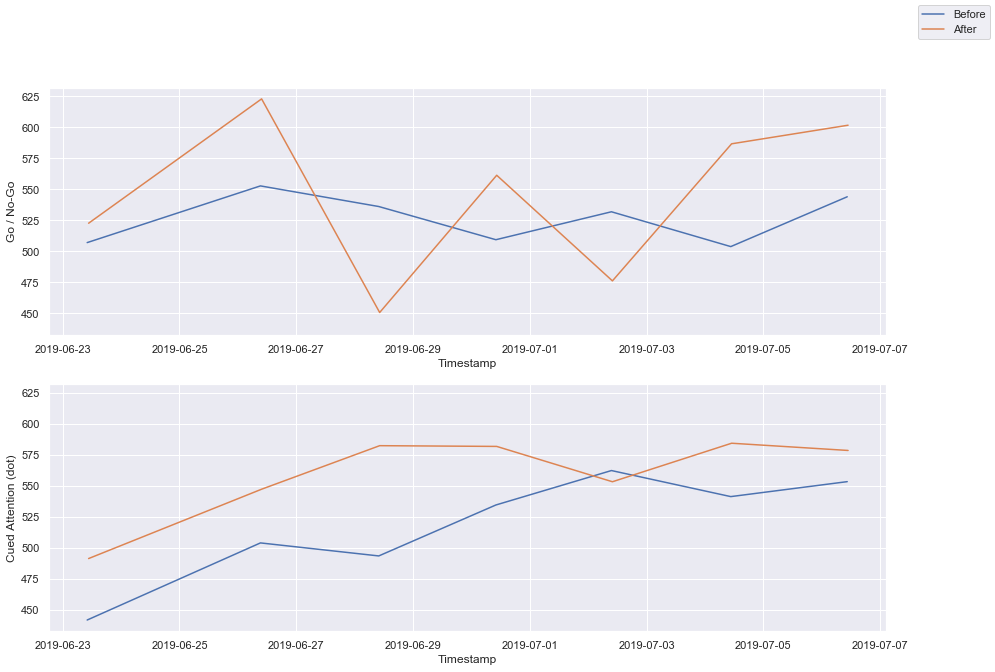

In [23]:
### Plot Meditation Effects Trends
print("Before and After Meditation")
meditatation = data[(data['Meditate / Activity'] == 'Meditate')]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=meditatation, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=meditatation, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()

Before and After Activity


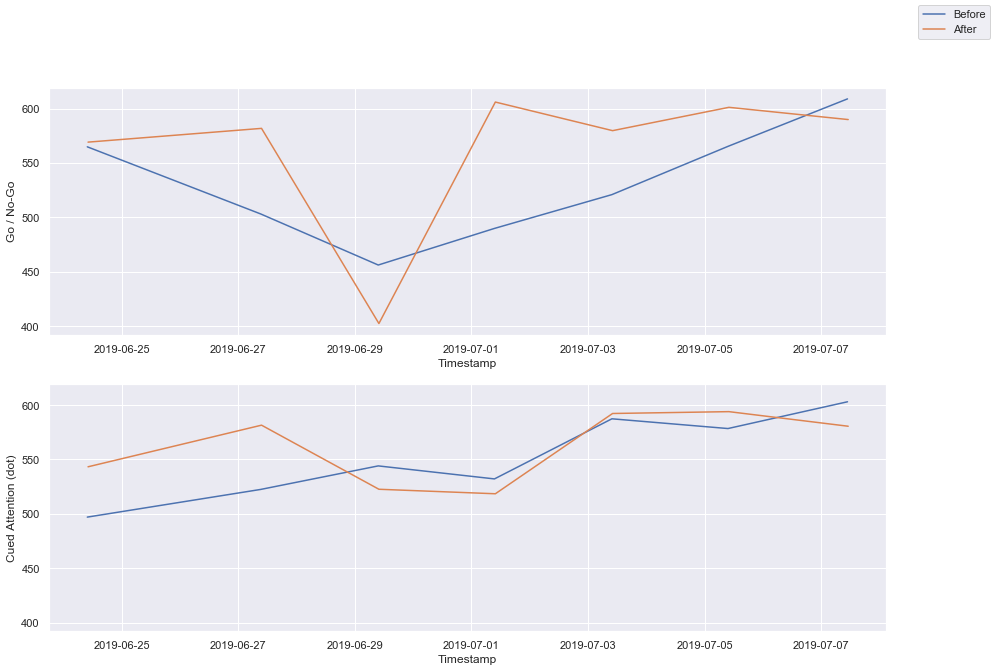

In [24]:
### Plot Activity Effects Trends
print("Before and After Activity")
activity = data[(data['Meditate / Activity'] == 'Activity')]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15,10))
sns.relplot(x="Timestamp", y="Go / No-Go", kind="line", hue='Before / After', data=activity, ax=ax1)
sns.relplot(x="Timestamp", y="Cued Attention (dot)", kind="line", hue='Before / After', data=activity, ax=ax2)
fig.legend(labels=['Before','After'])
plt.close(2)
plt.close(3)
plt.show()

------

# Statistical Analysis

In [25]:
data['Composite Score'] = (data['Go / No-Go'] + data['Cued Attention (dot)'])/2

### Comparision of Means

In [26]:
def stats_summary(data, label):
    print(label)
    print("-+-+-+-+-+-+-+-+-+-")
    print("Go / No-Go")
    print("Mean: " + str(data['Go / No-Go'].mean()))
    print("Max: " + str(data['Go / No-Go'].max()))
    print("Min: " + str(data['Go / No-Go'].min()))
    print("Std: " + str(data['Go / No-Go'].std()))
    print("-+-+-+-+-+-+-+-+-+-")
    print("Cued Attention (dot)")
    print("Mean: " + str(data['Cued Attention (dot)'].mean()))
    print("Max: " + str(data['Cued Attention (dot)'].max()))
    print("Min: " + str(data['Cued Attention (dot)'].min())) 
    print("Std: " + str(data['Cued Attention (dot)'].std()))
    print("-+-+-+-+-+-+-+-+-+-")
    print("Composite Score")
    print("Mean: " + str(data['Composite Score'].mean()))
    print("Std: " + str(data['Composite Score'].std()))

In [27]:
stats_summary(data, label="Full Data Summary")

Full Data Summary
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 540.8594285714286
Max: 622.755
Min: 402.447
Std: 54.50895813257131
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 548.0278571428571
Max: 603.05
Min: 441.605
Std: 39.12652322507764
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 544.4436428571429
Std: 38.47651791144759


In [28]:
meditation = data[data['Situation'] == 'After-Meditate']
before_med = data[data['Situation'] == 'Before-Meditate']
activity = data[data['Situation'] == 'After-Activity']
before_act = data[data['Situation'] == 'Before-Activity']
before = data[data['Before / After'] == 'Before']
after = data[data['Before / After'] == 'After']

In [29]:
stats_summary(before_med, label="Before Meditation")

Before Meditation
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 526.249
Max: 552.583
Min: 503.638
Std: 19.59799069632735
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 518.5055714285714
Max: 562.147
Min: 441.605
Std: 42.10730824871594
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 522.3772857142857
Std: 24.82588587183605


In [30]:
stats_summary(meditation, label="After Meditation")

After Meditation
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 545.8457142857143
Max: 622.755
Min: 450.486
Std: 65.09512758446745
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 559.6768571428571
Max: 584.179
Min: 491.179
Std: 33.74084100625716
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 552.7612857142857
Std: 38.12592644323235


In [31]:
stats_summary(before_act, label="Before Activity")

Before Activity
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 529.8817142857143
Max: 608.918
Min: 456.209
Std: 52.518271730621805
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 552.0987142857142
Max: 603.05
Min: 497.041
Std: 38.52796060747866
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 540.9902142857143
Std: 38.32293258269903


In [32]:
stats_summary(activity, label="After Activity")

After Activity
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 561.4612857142857
Max: 606.009
Min: 402.447
Std: 71.25358556057438
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 561.8302857142857
Max: 593.979
Min: 518.5
Std: 32.808141295082464
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 561.6457857142857
Std: 45.99450525230987


In [33]:
stats_summary(before, label="Before")

Before
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 528.0653571428571
Max: 608.918
Min: 456.209
Std: 38.12902062049355
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 535.3021428571428
Max: 603.05
Min: 441.605
Std: 42.51182849306973
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 531.6837499999999
Std: 32.48949476532021


In [34]:
stats_summary(after, label="After")

After
-+-+-+-+-+-+-+-+-+-
Go / No-Go
Mean: 553.6535
Max: 622.755
Min: 402.447
Std: 66.06532652289643
-+-+-+-+-+-+-+-+-+-
Cued Attention (dot)
Mean: 560.7535714285715
Max: 593.979
Min: 491.179
Std: 31.991755324228073
-+-+-+-+-+-+-+-+-+-
Composite Score
Mean: 557.2035357142856
Std: 40.84751651826785


In [35]:
def mean_diff_summary(data1, data2, label="Means Diffs"):
    print(label)
    print("Go / No-Go: " + str(data1['Go / No-Go'].mean() - data2['Go / No-Go'].mean()))
    print("Cued Attention (dot): " + str(data1['Cued Attention (dot)'].mean() - data2['Cued Attention (dot)'].mean()))
    print("Composite Score: " + str(data1['Composite Score'].mean() - data2['Composite Score'].mean()))

In [36]:
mean_diff_summary(activity, meditation, "Mean Differences: After Activity vs. After Meditation")

Mean Differences: After Activity vs. After Meditation
Go / No-Go: 15.615571428571457
Cued Attention (dot): 2.153428571428549
Composite Score: 8.884500000000003


In [37]:
mean_diff_summary(before_act, before_med, "Mean Differences: Before Activity vs. Before Meditation")

Mean Differences: Before Activity vs. Before Meditation
Go / No-Go: 3.6327142857143144
Cued Attention (dot): 33.593142857142766
Composite Score: 18.612928571428597


In [38]:
mean_diff_summary(activity, before_act, "Mean Differences: After Activity vs. Before Activity")

Mean Differences: After Activity vs. Before Activity
Go / No-Go: 31.5795714285714
Cued Attention (dot): 9.731571428571442
Composite Score: 20.65557142857142


In [39]:
mean_diff_summary(meditation, before_med, "Mean Differences: After Meditation vs. Before Meditation")

Mean Differences: After Meditation vs. Before Meditation
Go / No-Go: 19.596714285714256
Cued Attention (dot): 41.17128571428566
Composite Score: 30.384000000000015


### Cohen Effect

In [40]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

### Table of Cohen's Effect Size

| Effect Size | d    |
| ----------- | ---- |
| Very Small  | 0.01 |
| Small       | 0.20 |
| Medium      | 0.50 |
| Large       | 0.80 |
| Very large  | 1.20 |

In [41]:
def CohenEffectSummary(data1, data2, label="Cohen Effects"):
    print(label)
    print("Go / No-Go: " + str(CohenEffectSize(data1['Go / No-Go'], data2['Go / No-Go'])))
    print("Cue Attention: " + str(CohenEffectSize(data1['Cued Attention (dot)'], data2['Cued Attention (dot)'])))
    print("Composite Score: " + str(CohenEffectSize(data1['Composite Score'], data2['Composite Score'])))

In [42]:
CohenEffectSummary(after, before, label="Cohen Effects: Before and After")

Cohen Effects: Before and After
Go / No-Go: 0.47440594945211884
Cue Attention: 0.6765160332812595
Composite Score: 0.6914830585087121


In [43]:
CohenEffectSummary(meditation, before_med, label="Cohen Effects: Before and After Meditation")

Cohen Effects: Before and After Meditation
Go / No-Go: 0.4076700496419279
Cue Attention: 1.0790791112137241
Composite Score: 0.9444612018187484


In [44]:
CohenEffectSummary(activity, before_act, label="Cohen Effects: Before and After Activitiy")

Cohen Effects: Before and After Activitiy
Go / No-Go: 0.5045393152372722
Cue Attention: 0.271964374000929
Composite Score: 0.48793236674427615
